# Analyzing borrowers’ risk of defaulting

In this project, I am going to prepare a report for a bank’s loan division. The purpose of this project is to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. 
Here is my workplan for this project:

1. Exploring the data 
2. Detecting what's needs to be fixed in the data and fixing it (missing values, duplicates...)
3. Create categoris to help analys to data better (if necessary)
4. Checking the hypotheses
5. conclude the evidance found


IMPORTED:


In [1]:
import pandas as pd
import numpy as np
import nltk

from nltk import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()

import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
import requests
import io
    
# Downloading the csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/Preprocessing-project/main/credit_scoring_eng%20(1).csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding




**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In the next part i will start exploring the data.Some of what I am looking for:

-how many columns and rows it has

-looking at a few rows to check for potential issues with the data.

In [2]:
df.shape



(21525, 12)

In [3]:
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


 
From the first look on the data, it seems like there is data that doesn't correspond to reality - negative values in the days_employed column. Also we can see already there are missing values that we'll need to address later on.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB



We can see there are missing values in the dataset across two columns :total_income and days_employed. we can tell that because each column supposed to have 21525 non nulls in it, and these two columns have less. 

In [5]:

df[df.days_employed.isnull()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate



From this first investigation of the Data, it seems like the missing values in the 'days_employed' column and the 'total_income' column are symetric, but we cant be sure of this assumption until we'll cheack the missing values in those columns against eachother and confirm that the missing samples are of the same size

In [6]:
df[(df.total_income.isnull()) & (df.days_employed.isnull())].shape[0] == df[(df.total_income.isnull())].shape[0]



True

In [7]:
df.total_income.isnull().sum() / df.shape[0]

0.10099883855981417

**Intermediate conclusion**

Now we can say that the missing values in the missing values in the 'days_employed' column and the 'total_income' column are symetric. 

After calculating the percentage of the missing values compared to the whole dataset, we can see the missing data in these columns is 10% of the whole dataset, wich is a considerably large piece of data.

Later in the project i will address both columns to try and fill the missing values in those columns, but first i want to check whether the missing data could be due to the specific client characteristic, such as employment type or education.

I will do so by checking the distribution of the missing values across the unique values of the employment type and education, in order to find out wether the missing values are missing randomly or if there is a pattern.


In [8]:
df[df.total_income.isnull()]['income_type'].value_counts()


employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

In [62]:
df['income_type'].value_counts()


employee                       11084
business                        5078
retiree                         3829
civil servant                   1457
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [10]:
# Reviewer's code

print('Nan dataframe. Income type normalized distribution:')
display(df[df.total_income.isna()]['income_type'].value_counts(normalize=True))

print('Not Nan dataframe. Income type normalized distribution:')
display(df[~df.total_income.isna()]['income_type'].value_counts(normalize=True))

Nan dataframe. Income type normalized distribution:


employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

Not Nan dataframe. Income type normalized distribution:


employee                       0.517493
business                       0.236525
retiree                        0.177924
civil servant                  0.067800
unemployed                     0.000103
student                        0.000052
paternity / maternity leave    0.000052
entrepreneur                   0.000052
Name: income_type, dtype: float64

In [11]:
df[df.total_income.isnull()]['education'].value_counts()


secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
Some College              7
SOME COLLEGE              7
PRIMARY EDUCATION         1
Primary Education         1
Name: education, dtype: int64

In [12]:
df['education'].value_counts()


secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

**conclusions**


After cheacking all of the columns that could have an impcat on missing values in the total_income column, i can confirm that the missing values in the total_income column are random.

I didnt find any patterns that could have explaind the missing values, after checking the distribution of the missing values across all of the columns that could have an impact on them (the distribution check showed that the missing values are spread across the columns in the same way - slightly  more than 10% of each unique value are nissing)

Later on, i will replace the missing values with the avrege of total income, considering the categories: education and income_type, but first 
i need to make sure there are not any other errors that could effect my actions -    i already witnessed some different registers in the 'education column' that needs to be fixed. 

Next i will address the problems i mentioned:
- duplicates
- different registers
- incorrect artifacts
- missing values

## Data transformation

first i will check every column to see what issues we may have in them.

**Education**

In [13]:
print(df['education'].value_counts())

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64


I can see there are different registers in this column thats need to be fixed:


In [14]:
df['education'] = df['education'].str.lower() 

In [15]:
print(df['education'].value_counts())


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64


**Children**

In [16]:
print(df['children'].value_counts())



 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Based on the distribution of values in the `children` column, we can see that there are 2 values that seem strange,-1 and 20. it is not possible to have -1 childern and unlikely to have 20.This is probably the effect of humen type errors the percentage of this problematic data is very low, so we can just replace it with the value 0. 

In [17]:

TOO_MANY = 20

print("Total number of rows in the children column: ", df['children'].value_counts().sum())
print("The percentage of problematic data: ", 100*(df[df['children']<0].shape[0]+df[df['children']>=TOO_MANY].shape[0])/df.shape[0], '%')


Total number of rows in the children column:  21525
The percentage of problematic data:  0.5714285714285714 %


In [18]:
df['children'] = df['children'].replace([-1,20],0)


In [19]:
df['children'].value_counts()


0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

days_employed column:

From the first look at the days_employed column, we could see there is data that doesn't correspond to reality - negative values and way to high values. Next i will check the distribution and decide if he data in this column is not too corrupted

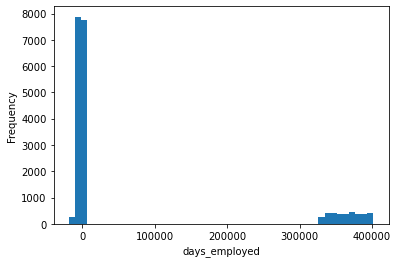

In [20]:
plt.hist(df['days_employed'], bins=50)
plt.xlabel('days_employed')
plt.ylabel('Frequency')
None

We can see that the'days_employed'column have a high percentage of unusable data. We need to inform the data Engenderes and delete this column.

In [21]:
df = df.drop(['days_employed'],axis = 1)



In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   dob_years         21525 non-null  int64  
 2   education         21525 non-null  object 
 3   education_id      21525 non-null  int64  
 4   family_status     21525 non-null  object 
 5   family_status_id  21525 non-null  int64  
 6   gender            21525 non-null  object 
 7   income_type       21525 non-null  object 
 8   debt              21525 non-null  int64  
 9   total_income      19351 non-null  float64
 10  purpose           21525 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


**Clients age:**


In [23]:
print(df['dob_years'].value_counts())


35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


The problem in the dob_years column is that we have 101 rows that the value of age is 0. This is not possible because no one can have 0 years as his age. This error is probably a typo (presssing 0 insted of 60 for example). The solution for this problem is to change all the 0s to the average age.  

In [24]:

age_avg = df['dob_years'].mean()
df.loc[(df.dob_years == 0),'dob_years']=age_avg

In [25]:
print(df['dob_years'].value_counts())


35.00000    617
40.00000    609
41.00000    607
34.00000    603
38.00000    598
42.00000    597
33.00000    581
39.00000    573
31.00000    560
36.00000    555
44.00000    547
29.00000    545
30.00000    540
48.00000    538
37.00000    537
50.00000    514
43.00000    513
32.00000    510
49.00000    508
28.00000    503
45.00000    497
27.00000    493
56.00000    487
52.00000    484
47.00000    480
54.00000    479
46.00000    475
58.00000    461
57.00000    460
53.00000    459
51.00000    448
59.00000    444
55.00000    443
26.00000    408
60.00000    377
25.00000    357
61.00000    355
62.00000    352
63.00000    269
64.00000    265
24.00000    264
23.00000    254
65.00000    194
22.00000    183
66.00000    183
67.00000    167
21.00000    111
43.29338    101
68.00000     99
69.00000     85
70.00000     65
71.00000     58
20.00000     51
72.00000     33
19.00000     14
73.00000      8
74.00000      6
75.00000      1
Name: dob_years, dtype: int64


**family_status**

In [26]:
print(df['family_status'].value_counts())
print(df['family_status'].value_counts().sum())



married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64
21525


 No problems in the family_status column


**gender**

In [27]:
print(df['gender'].value_counts())


F      14236
M       7288
XNA        1
Name: gender, dtype: int64


There is only one value that is "Problematic" - 'XNA'.In this specific column, i think it is probably the result of someone not willing to expose Their gender, and not a typo. Anyway, it is not significant because it is only one entry out of the whole data, so we can just ignore it

**income_type**

In [28]:
print(df['income_type'].value_counts())


employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


 No problems in the income_type column

Next i will check if there are any duplicates in the data. If there are, ill drop them. 

In [29]:

df.duplicated().sum()

71

In [30]:
df.drop_duplicates(inplace=True) 

In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(21454, 11)



The new dataset has 21454 rows. Before we had 21525 rows with 71 duplicates. I droped the duplicated data and made the dataset smaller by 0.3%

### Restoring missing values in `total_income`

Fron previous Investigations, I can say there are missing values in the 'total_income' column thats need to be filled. in order to do that i am going use data from other columns that could impact how i should fill the missing values in 'total_income' (for example, age, income type and education can impact the total income of a client)


In [33]:

def age_group(age):

    if age <= 21:
        return 'minor'
    if age <= 64:
        return 'adult'
    return 'retired' 
    

In [34]:

age_group(27)

'adult'

In [35]:

df['age_group'] = df['dob_years'].apply(age_group)


In [36]:

df['age_group'].value_counts()


adult      20383
retired      895
minor        176
Name: age_group, dtype: int64

In [37]:

table_no_missing = df[df.notna()]

table_no_missing.tail()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
21520,1,43.0,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,adult
21521,0,67.0,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,retired
21522,1,38.0,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,adult
21523,3,38.0,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,adult
21524,2,40.0,secondary education,1,married,0,F,employee,0,13127.587,to buy a car,adult


Next, i want to check wether i should use mean or median to fill the missing values. in order to do that, i am going to check wether there are outlires in the tota_income column that could effect the resuts. 

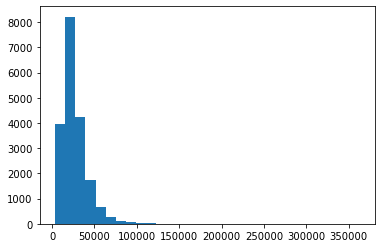

In [38]:
plt.hist(df.total_income, bins=30)
None


In [39]:
df['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

In [40]:
df['total_income'].median()

23202.87

In [41]:
df.groupby('education_id')['total_income'].median()

education_id
0    28054.5310
1    21836.5830
2    25618.4640
3    18741.9760
4    25161.5835
Name: total_income, dtype: float64

Based on this investigation, we can see that the nean and the median are supposed to be relatively close, so we can use to mean to fill the missing values, but we will do that based on other important categories that should come to consideration when filling the missing valued.

In [42]:
df['total_income'] = df.groupby(['education_id','income_type'])['total_income'].transform(
lambda grp:grp.fillna(np.mean(grp)))

In [43]:
df[df['total_income'].isnull()]

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   dob_years         21454 non-null  float64
 2   education         21454 non-null  object 
 3   education_id      21454 non-null  int64  
 4   family_status     21454 non-null  object 
 5   family_status_id  21454 non-null  int64  
 6   gender            21454 non-null  object 
 7   income_type       21454 non-null  object 
 8   debt              21454 non-null  int64  
 9   total_income      21454 non-null  float64
 10  purpose           21454 non-null  object 
 11  age_group         21454 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.1+ MB


## Categorization of data

In order to test the hypotheses, i will work with categorized data. This will help me compare the data in a wider way and bythat i could draw conections and undserstand the correlation between different types of clients and paying back their loans on time. In order to do that, i will categorize the data in the next columns: 'purpose' and 'total_income'. These columns contain a lot of unique values so it will be much easier to work with the categorised version of their data.

In [45]:

df['purpose'].unique()


array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [46]:
house_category = ['house','real','estate','property','housing','residential']
wedding_category = ['wedding']
education_category = ['education','university','educated']
car_category = ['car','cars',]

In [47]:
# Reviewer's code

from nltk.stem import SnowballStemmer

english_stemmer = SnowballStemmer('english')   

# Get the list of stem values.
purpose_words = df['purpose'].str.split().apply(lambda x: [english_stemmer.stem(y) for y in x])

def purpose_group(purpose_words):

    if 'wed' in purpose_words:
        return 'wedding'
    elif 'estat' in purpose_words or 'hous' in purpose_words or 'properti' in purpose_words:
        return 'real_estate'
    elif 'car' in purpose_words:
        return 'car'
    else:# 'educ' or 'uni' in purpose_words:
        return 'education'
    
# Apply function to this list.    
purpose_words.apply(purpose_group)


0        real_estate
1                car
2        real_estate
3          education
4            wedding
            ...     
21520    real_estate
21521            car
21522    real_estate
21523            car
21524            car
Name: purpose, Length: 21454, dtype: object

In [48]:
def lemmatization(line):
    words = nltk.word_tokenize(line)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
    lemmas = [l.lower() for l in lemmas]
    if any (word in lemmas for word in house_category):
        return 'house'
    elif any (word in lemmas for word in wedding_category):
        return 'wedding'
    elif any (word in lemmas for word in education_category):
        return 'education'
    elif any (word in lemmas for word in car_category):
        return 'car'
    else:
        return 'other'
    

    

In [49]:
import nltk
import ssl


nltk.download()
nltk.download('wordnet',quiet=True)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [50]:
# Create a column with the categories and count the values for them
df['purpose_category'] = df['purpose'].apply(lemmatization)
df['purpose_category'].value_counts()

house        10811
car           4306
education     4013
wedding       2324
Name: purpose_category, dtype: int64

Next, i will categorize the 'total_income' column. I want to know what ranges i should base the different numerical groups on, so i will use the describe() method to get some info on tota_income

In [51]:
df['total_income'].describe()


count     21454.000000
mean      26797.900567
std       15724.532575
min        3306.762000
25%       17219.817250
50%       24379.051500
75%       31729.172000
max      362496.645000
Name: total_income, dtype: float64

In [52]:
def incomme_level(income):
    
    low_income = 16488.504500
    avg_income = 26787.568355
    high_income = 32549.611000
    very_high_income = 100000
    if income <= low_income :
        return 'low income'
    elif income > low_income and income <= avg_income :
        return 'med income'
    elif income > avg_income and income <= high_income:
        return 'high income'
    else:
        return 'very high income'


In [53]:

df['income_category'] = df['total_income'].apply(incomme_level)


In [54]:

df['income_category'].value_counts()

med income          8264
very high income    5025
low income          4838
high income         3327
Name: income_category, dtype: int64

In addition to the categories i made, we can see that there are columns that are interchangeable so we can make a dictionary out of them- education and education_id and family_status and family_status_id.


In [55]:
pd.Series(df.family_status.values,index = df.family_status_id).to_dict()


{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

In [56]:



pd.Series(df.education.values,index = df.education_id).to_dict()


{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [57]:
df.groupby('children')['debt'].mean().reset_index().sort_values(by = 'children')


,children,debt
0,0,0.075419
1,1,0.092346
2,2,0.094542
3,3,0.081818
4,4,0.097561
5,5,0.000000


**Conclusion**

Based on the manipulations and observations i made, i can see that there is a slight correlation between having children and paying back on time. There is a 2% difference in the loan default rate between clients who have 4 children, and clients that dont have any. Also we can see that clients that have 5 kids always pay back on time.


In [58]:
# Reviewer's code

def my_mean(x): return x.mean()*100

# We can you our own function in agg method
df.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,14214,1072,7.541860
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


**Is there a correlation between family status and paying back on time?**

In [59]:
df.groupby('family_status')['debt'].mean().reset_index().sort_values(by = 'debt')

,family_status,debt
4,widow / widower,0.065693
1,divorced,0.071130
2,married,0.075452
0,civil partnership,0.093471
3,unmarried,0.097509



**Conclusion**


Based on the manipulations and observations i made, i can see that there is a slight correlation between family status and paying back on time. We can see that widows/widowers, divorced and married clients are slightly more likely to pay back their loan on time, than clients that are in a civil partnership	or unmarried.  


**Is there a correlation between income level and paying back on time?**

In [60]:

df.groupby('income_category')['debt'].mean().reset_index().sort_values(by = 'debt')


,income_category,debt
3,very high income,0.069453
1,low income,0.079165
0,high income,0.080854
2,med income,0.089545


**Conclusion**


Based on the manipulations and observations i made, i can see that there is a slight correlation between income level and paying back on time. We can see that clients that are in the 'very high income' category are slightly more likely to pay back their loan on time, but there is not a line to draw between how high is clients income and wether they will pay their loan on time, because clients in the 'high income' category are still less likely to pay their loan on time then clients in the 'low income' category.

**How does credit purpose affect the default rate?**

In [61]:
df.groupby('purpose_category')['debt'].mean().reset_index().sort_values(by = 'debt')


,purpose_category,debt
2,house,0.072334
3,wedding,0.080034
1,education,0.092200
0,car,0.093590


**Conclusion**
Based on the manipulations and observations i made, i can see that there is a slight correlation between the purpose of the loan and paying it back on time. We can see that clients that wanted the loan in order to buy/build a house are slightly more likely to pay back their loan on time, than clients that wanted the loan for an education purpose or a car related purpose (aprox 2 % difference), and using the loan for a weddig is just between clients that wanted the loan in order to buy/build a house and the other two. 


# General Conclusion 
In this general conclusion , i will decribe the decisions i made through the project and explain how i got to the conclusions i made. 

After Investigating the data, i noticed there are missing values across two columns - total_income and days_employed. after investigating these columns i decided to drop the days_employed column due to unusable data and filled the missing data in the total_income column, based on other columns that could have impacted its mean (education and income type).Also, i detected the different registers and duplicates that were in the data and fixed them. 

After all of these actions, meant to clean the data - i categorized the data in order to help me compare the data in a wider way and by that to be able to  draw conections and undserstand the correlation between different types of clients and paying back their loans on time.

Based on the categoris i made and the functions i wrote, i was able to check the hypotheses that were in question and reach the following conclusion about the next categories of clients:

Based on the loan purpose, we can see that the most reliable clients are the clients wanted the loan in order to buy/build a house with 7.23% chance of not paying back their loan on time.
The most irresponsible clients are the clients that wanted the loan for a car related purpose with 9.35% chance of not paying back their loan on time 

Based on the income of the clients, the most reliable clients are the clients in the "very high income" category with 6.94 % chance of not to pay back their loan on time
The most irresponsible clients are the clients in the "med income" category with 8.95 % chance of not to pay back their loan on time.


Regarding  the question if the customer’s marital status and number of children has an impact on whether they will default on a loan, my conclusion is that there is a connection that i will show in the next paragraphs: 

Based on marital status, the most reliable clients are the clients who have benn married before, with widowed clients at the topof that list with 6.56% chance of not paying their loan on time.
he most irresponsible clients are the clients that was never married, with 9.34% for clients in a civil partnership	and 9.75% for unmarried	clients.

Based on number of children, the most reliable clients are clients with 5 children, with 0% chance of not paying back on time - but we have a very small sample size regarding those clients (9 clients)
the next group are clients with 0 children with 7.54 % of not paying back on time. 
the most irresponsible are clients with 4 children with 9.75 % of not paying back on time.
